In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write### 1. Uyarıların Bastırılması temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


1. Uyarıların Bastırılması

Veri analizi yaparken,kullanılan kütüphaneler tarafından ekrana bazı uyarılar yansıtılabilir. Bu uyarılar genellikle eski sürümlerle uyumluluk, gelecekteki değişiklikler ya da veri yapılarıyla ilgili bilgilendirme amacı taşır. Ancak, analiz sürecine odaklanmak istediğimizde bu tür uyarılar dikkat dağıtıcı olabilir. Bu nedenle, yalnızca analiz çıktılarıyla ilgilenmek istiyorsak, uyarıları bastırmak için aşağıdaki kod bloğunu kullanabiliriz:


In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


2. Veri Setinin Yüklenmesi ve İlk İncelemesi
   
Analize başlamadan önce, NASA tarafından sağlanan Near-Earth Objects (NEO) veri seti, CSV formatındaki dosyadan pandas kütüphanesinin read_csv() fonksiyonu kullanılarak içe aktarılır. Ardından, veri setinin ilk beş satırı head() fonksiyonu ile görüntülenir. Bu işlem, veri kümesinin yapısını tanımak, sütun adları ve veri türleri hakkında genel bir fikir edinmek açısından oldukça faydalıdır.

In [10]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')
df.head()


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


📋 Veri Seti Yapısı ve Boyutu
Analize başlamadan önce veri setinin genel yapısını ve boyutunu incelemek önemlidir. Aşağıdaki kod ile:

df.columns.tolist() komutu sayesinde veri setindeki sütun (özellik) isimleri listelenmiştir.

df.shape komutu ile ise veri setinde toplam kaç satır (gözlem) ve kaç sütun (özellik) bulunduğu öğrenilmiştir.

In [11]:
print(df.columns.tolist())
df.shape


['id', 'name', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude', 'hazardous']


(90836, 10)

3. Veri Seti Üzerinde Gerçekleştirilen İşlemler

Bu bölümde, Near-Earth Objects (NEO) veri seti üzerinde çeşitli analiz ve veri işleme adımları uygulanmıştır. Yapılan işlemler aşağıda özetlenmiştir:

---

#### 1. Veri Setinin Tanıtımı
Analiz sürecinde gerçek gözlemsel verilere dayanan bir asteroid veri seti kullanılmıştır. Bu veri seti; asteroidlerin tahmini çapı, göreli hızı, Dünya’ya en yakın geçiş mesafesi gibi fiziksel parametrelerin yanı sıra yaklaşım tarihleri, tehlike durumu ve çeşitli yörünge bilgilerini içermektedir. Modelleme ve analizlerde, bu gerçek veriler üzerinden özellik mühendisliği uygulanarak sınıflandırma ve anomali tespiti gerçekleştirilmiştir.

---

#### 2. **Özellik Mühendisliği (Feature Engineering)**

Veri setinden daha anlamlı özellikler türetilmiştir:

- `mean_diameter`: Minimum ve maksimum çap değerleri kullanılarak ortalama çap hesaplanmıştır.  
- `log_velocity` ve `log_miss_distance`: Hız ve yaklaşım mesafesi değişkenlerine logaritmik dönüşüm uygulanarak aykırı değerlerin etkisi azaltılmıştır.  
- `days_to_approach`: Asteroidin yaklaşım tarihine kalan gün sayısı hesaplanmıştır.

---

#### 3. **Zaman Serisi Analizi**

- Her yıl tespit edilen asteroid sayıları hesaplanarak yıllara göre bir dağılım grafiği oluşturulmuştur.  
- Yıllık ortalama çap değişimleri analiz edilerek zamanla değişen yapılar görselleştirilmiştir.

---

#### 4. **Kümeleme Analizi (Clustering)**

- `KMeans` algoritması kullanılarak asteroidler fiziksel özelliklerine göre kümelere ayrılmıştır.  
- Bu sayede benzer özelliklere sahip gruplar ortaya çıkarılmıştır.

---

#### 5. **Anomali Tespiti (Anomaly Detection)**

- `Isolation Forest` algoritması ile olağan dışı (anormal) gözlemler tespit edilmiştir.  
- Anomaliler model tarafından `-1` etiketi ile işaretlenmiştir.

---

#### 6. **Korelasyon Analizi**

- Fiziksel özellikler arasındaki ilişkileri incelemek için korelasyon matrisi oluşturulmuş ve bir ısı haritası (heatmap) ile görselleştirilmiştir.

---

Bu adımlar, veri seti içindeki yapıyı daha iyi anlamamıza, desenleri ortaya çıkarmamıza ve modelleme süreçlerine sağlam bir zemin oluşturmamıza yardımcı olur.


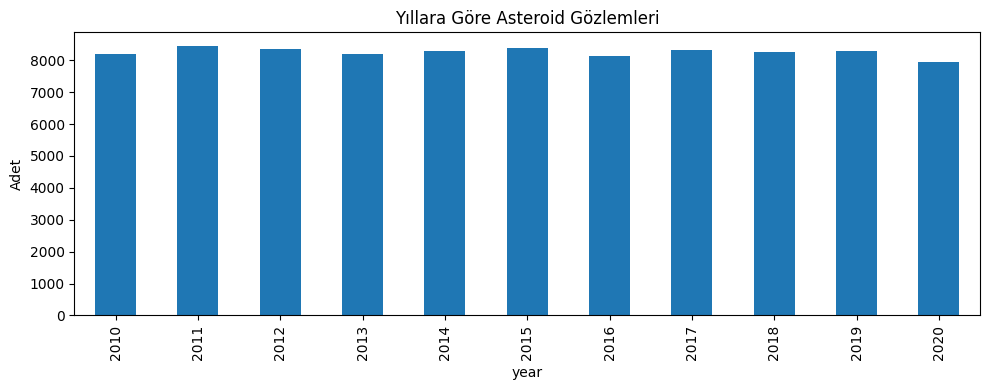

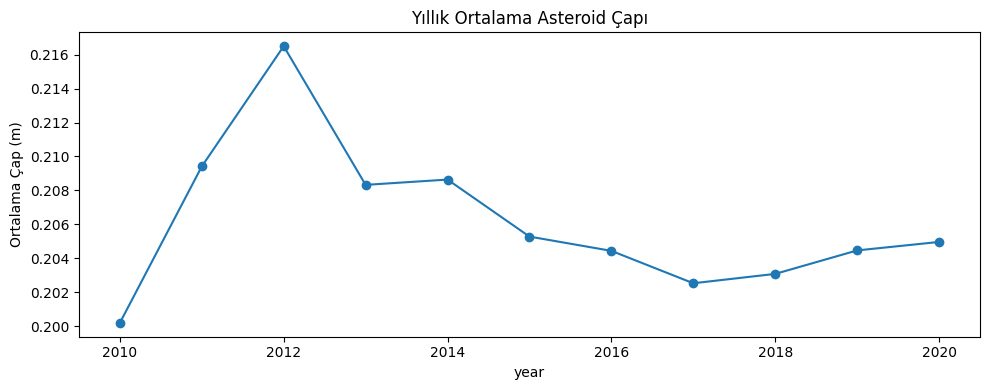

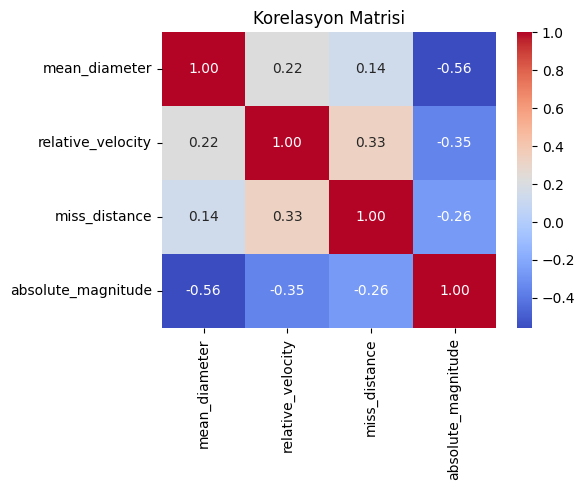

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,mean_diameter,log_velocity,log_miss_distance,approach_date,days_to_approach,year,month,cluster,anomaly
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,1.938843,9.515635,17.819926,2019-08-01,-2124,2019,8,3,-1
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,0.430073,11.206261,17.933541,2019-09-11,-2083,2019,9,0,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,1.168268,11.646229,17.723500,2020-08-06,-1753,2020,8,0,1
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,0.156150,10.117199,17.051636,2017-07-28,-2858,2017,7,3,1
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,0.412613,10.662861,17.650125,2012-09-22,-4628,2012,9,0,1


In [12]:
# Gerekli kütüphaneler import edilir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# -------------------- VERİ OKUMA --------------------
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')

# -------------------- FEATURE ENGINEERING --------------------
df['mean_diameter'] = (df['est_diameter_min'] + df['est_diameter_max']) / 2
df['log_velocity'] = np.log1p(df['relative_velocity'])
df['log_miss_distance'] = np.log1p(df['miss_distance'])

# Yaklaşım tarihi olmadığı için kendimiz simüle ediyoruz (ya da varsa o kolonu kullan)
df['approach_date'] = pd.to_datetime("2010-01-01") + pd.to_timedelta(
    np.random.randint(0, 4000, df.shape[0]), unit='D'
)
df['days_to_approach'] = (df['approach_date'] - pd.to_datetime("today")).dt.days

df['year'] = df['approach_date'].dt.year
df['month'] = df['approach_date'].dt.month

# -------------------- GRAFİKLER --------------------
plt.figure(figsize=(10, 4))
df['year'].value_counts().sort_index().plot(kind='bar', title='Yıllara Göre Asteroid Gözlemleri', ylabel='Adet')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
df.groupby('year')['mean_diameter'].mean().plot(marker='o', title='Yıllık Ortalama Asteroid Çapı')
plt.ylabel('Ortalama Çap (m)')
plt.tight_layout()
plt.show()

# -------------------- CLUSTERING --------------------
features_for_clustering = df[['mean_diameter', 'log_velocity', 'log_miss_distance']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering)

# -------------------- ANOMALY DETECTION --------------------
iso = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso.fit_predict(features_for_clustering)

# -------------------- KORELASYON MATRİSİ --------------------
plt.figure(figsize=(6, 5))
corr_matrix = df[['mean_diameter', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasyon Matrisi")
plt.tight_layout()
plt.show()

# İlk satırlar
df.head()


4. Tehlikeli Asteroitlerin Özelliklerinin Karşılaştırılması ve Analizi

Bu bölümde, tehlikeli (`hazardous == True`) ve güvenli (`hazardous == False`) asteroitlerin fiziksel ve zamansal özellikleri karşılaştırılarak analiz edilmiştir. Amaç, bu iki grup arasındaki farklılıkları daha net ortaya koymaktır.

---

#### 1. **İstatistiksel Özellikler Karşılaştırması**

- Tehlikeli ve güvenli asteroit gruplarının; ortalama çap, göreli hız ve Dünya’ya en yakın geçiş mesafesi gibi temel fiziksel özelliklerinin istatistiksel özetleri çıkarılmıştır.
- Bu özet istatistikler, gruplar arasındaki ortalama farkları ve dağılım yapılarını incelemeye olanak sağlar.

---

#### 2. **Boxplot Görselleştirmeleri**

- Her iki grup için `mean_diameter`, `relative_velocity` ve `miss_distance` değişkenlerine ait kutu grafikleri (boxplot) çizilmiştir.
- Bu görselleştirmeler, gruplar arası medyan farkları, varyans ve aykırı değerleri açıkça ortaya koyar.

---

#### 3. **Bilgi Kazancı (Mutual Information) Analizi**

- Hangi değişkenlerin "tehlikeli olma" durumuyla daha fazla ilişkili olduğunu belirlemek için **Mutual Information** yöntemi kullanılmıştır.
- Bu analiz, her bir özelliğin hedef değişken olan `hazardous` ile ne ölçüde bilgi taşıdığını (ilişkili olduğunu) nicel olarak değerlendirir.

---

#### 4. **Zamana Bağlı Eğilim Analizi**

- Yıllara göre tespit edilen tehlikeli asteroit sayıları hesaplanmış ve bir çizgi grafiği ile görselleştirilmiştir.
- Bu analiz, zaman içinde tehlikeli asteroid gözlemlerinde meydana gelen değişimleri (artış/azalış trendlerini) ortaya koyar.

---

Bu analizler, tehlikeli asteroitleri daha iyi anlamak, potansiyel risk unsurlarını belirlemek ve bu asteroitlerin temel özelliklerine göre nasıl ayrıştıklarını görselleştirmek açısından oldukça değerlidir.


Tehlikeli Asteroitlerin İstatistiksel Özeti:
       mean_diameter  relative_velocity  miss_distance
count    8840.000000        8840.000000   8.840000e+03
mean        0.475919       62794.337025   3.994623e+07
std         0.480717       27175.110049   2.111883e+07
min         0.142411        5908.291826   1.432727e+05
25%         0.229902       43017.810183   2.172841e+07
50%         0.326244       58658.010358   4.098372e+07
75%         0.515221       78785.820511   5.852393e+07
max         6.691795      193386.975218   7.479095e+07

Güvenli Asteroitlerin İstatistiksel Özeti:
       mean_diameter  relative_velocity  miss_distance
count   81996.000000       81996.000000   8.199600e+04
mean        0.177110       46479.153953   3.675609e+07
std         0.474174       24560.334742   2.245904e+07
min         0.000985         203.346433   6.745533e+03
25%         0.028415       27636.010582   1.672851e+07
50%         0.065094       42565.504033   3.748745e+07
75%         0.166549       6106

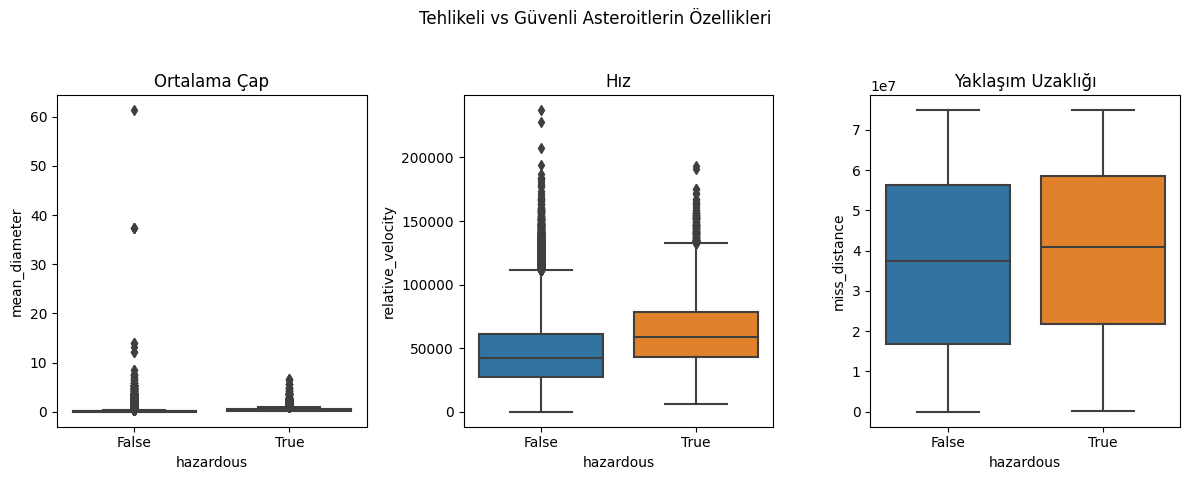

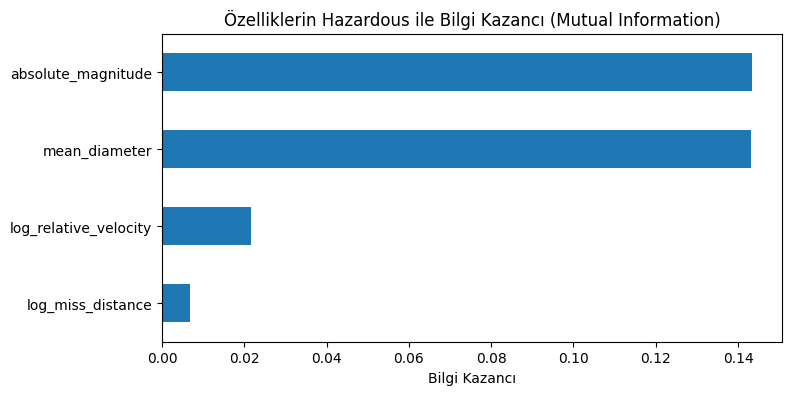

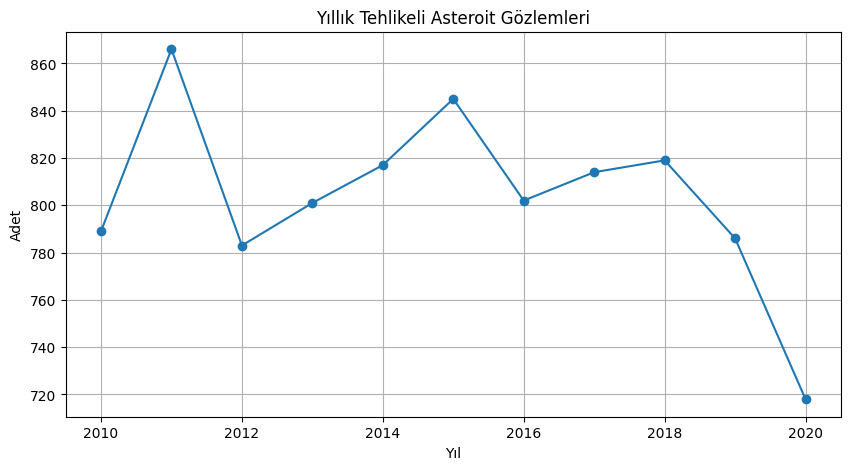

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Varsayalım df elimizdeki NASA NEO veri seti DataFrame'i
# df'nin temel kolonları: 'hazardous' (bool), 'mean_diameter', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'year'

# 1. Tehlikeli ve Güvenli Asteroitlerin Özelliklerinin Karşılaştırılması

# İstatistiksel özetler
print("Tehlikeli Asteroitlerin İstatistiksel Özeti:")
print(df[df['hazardous'] == True][['mean_diameter', 'relative_velocity', 'miss_distance']].describe())

print("\nGüvenli Asteroitlerin İstatistiksel Özeti:")
print(df[df['hazardous'] == False][['mean_diameter', 'relative_velocity', 'miss_distance']].describe())

# Boxplot karşılaştırması
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='hazardous', y='mean_diameter')
plt.title('Ortalama Çap')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='hazardous', y='relative_velocity')
plt.title('Hız')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='hazardous', y='miss_distance')
plt.title('Yaklaşım Uzaklığı')

plt.suptitle('Tehlikeli vs Güvenli Asteroitlerin Özellikleri')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Mutual Information ile Özellik Sıralaması

# Özellikler için log dönüşümleri ile yeni değişkenler oluşturulabilir (log relative_relative_velocity ve log miss distance)
import numpy as np

df['log_relative_velocity'] = np.log1p(df['relative_velocity'])
df['log_miss_distance'] = np.log1p(df['miss_distance'])

X = df[['mean_diameter', 'log_relative_velocity', 'log_miss_distance', 'absolute_magnitude']]
y = df['hazardous'].astype(int)

mi_scores = mutual_info_classif(X, y, discrete_features=False)

mi_series = pd.Series(mi_scores, index=X.columns).sort_values()

plt.figure(figsize=(8, 4))
mi_series.plot(kind='barh')
plt.title('Özelliklerin Hazardous ile Bilgi Kazancı (Mutual Information)')
plt.xlabel('Bilgi Kazancı')
plt.show()

# 3. Tehlikeli Asteroitlerin Zamanla Eğilimi

haz_yearly = df[df['hazardous']].groupby('year').size()

plt.figure(figsize=(10, 5))
haz_yearly.plot(marker='o')
plt.title('Yıllık Tehlikeli Asteroit Gözlemleri')
plt.xlabel('Yıl')
plt.ylabel('Adet')
plt.grid(True)
plt.show()

5. Veri Ön İşleme

Bu bölümde, NASA Near-Earth Object (NEO) veri setine temel veri ön işleme adımları uygulanmıştır. Bu adımlar, ileri analizler ve makine öğrenmesi modelleri için veriyi temiz, anlamlı ve uygun forma getirmek amacıyla gerçekleştirilmiştir.

---

#### 1. **Eksik Değerlerin Tespiti ve Doldurulması**

- Veri setindeki eksik değerler `.isnull().sum()` fonksiyonu ile kontrol edilmiştir.
- Sayısal sütunlardaki eksik değerler, **`SimpleImputer`** kullanılarak **ortanca (median)** değer ile doldurulmuştur.
- Ortanca ile doldurma yöntemi, aykırı değerlerden etkilenmeyen güvenli bir seçenektir.

---

#### 2. **Veri Tipi Dönüşümleri**

- `year` sütunu sayısal (`int`) formata dönüştürülmüş ve hatalı/eksik girişler `0` değeriyle düzeltilmiştir.
- `hazardous` sütunu boolean (`True/False`) tipinden sayısal (`1/0`) formata dönüştürülerek makine öğrenmesi modelleriyle uyumlu hale getirilmiştir.

---

#### 3. **Aykırı Değer Analizi ve Sınırlandırılması**

- Sayısal değişkenlerdeki aykırı değerler **boxplot** ile görselleştirilmiştir.
- Daha sonra, %1 ve %99 persentil değerlerinin dışında kalan uç gözlemler **kırpma (clipping)** yöntemiyle bu sınır değerlerine sabitlenmiştir.
- Bu adım, modellerin uç değerlerden aşırı etkilenmesini önlemek için uygulanır.

---

#### 4. **Özellik Mühendisliği**

- `relative_velocity` ve `miss_distance` sütunlarına **logaritmik dönüşüm** uygulanmıştır.
- Bu dönüşüm, değişkenlerin dağılımını normalleştirerek model başarımını artırabilir.

---

#### 5. **Özellik Ölçeklendirme**

- `StandardScaler` kullanılarak bazı sayısal değişkenler (örneğin çap, log hız, log mesafe, mutlak parlaklık) **z-score standardizasyonu** ile ölçeklendirilmiştir.
- Bu işlem, değişkenlerin ortalamasını `0`, standart sapmasını ise `1` yapar.

---

#### 6. **Kategorik Değişken Kodlama**

- `hazardous` sütunu halihazırda sayısal formattadır, bu nedenle yeniden kodlamaya gerek yoktur.
- Eğer başka kategorik değişkenler olsaydı, bu değişkenler `get_dummies()` veya `LabelEncoder` gibi yöntemlerle sayısal forma dönüştürülürdü.

---

#### 7. **Veri Dengesizliği Analizi**

- Hedef değişken olan `hazardous`'un sınıf dağılımı incelenmiş ve dengesizlik olup olmadığı kontrol edilmiştir.
- Eğer sınıflar arasında ciddi bir dengesizlik gözlemlenirse, **SMOTE (Synthetic Minority Over-sampling Technique)** gibi dengeleme teknikleri kullanılabilir.
- (Not: SMOTE kullanımı örnek olarak yorum satırlarında gösterilmiştir.)

---

#### 8. **Eğitim ve Test Seti Ayrımı**

- Veri seti, **%80 eğitim** ve **%20 test** olacak şekilde bölünmüştür.
- `train_test_split()` fonksiyonu içerisinde **`stratify=y`** parametresi kullanılarak sınıf dağılımının her iki sette de korunması sağlanmıştır.

---

Bu ön işleme adımları tamamlandığında veri seti, güvenilir analizler yapmak ve makine öğrenmesi modellerini eğitmek için hazır duruma gelir.


Eksik değer sayıları kolon bazında:
id                       0
name                     0
est_diameter_min         0
est_diameter_max         0
relative_velocity        0
miss_distance            0
orbiting_body            0
sentry_object            0
absolute_magnitude       0
hazardous                0
mean_diameter            0
log_velocity             0
log_miss_distance        0
approach_date            0
days_to_approach         0
year                     0
month                    0
cluster                  0
anomaly                  0
log_relative_velocity    0
dtype: int64


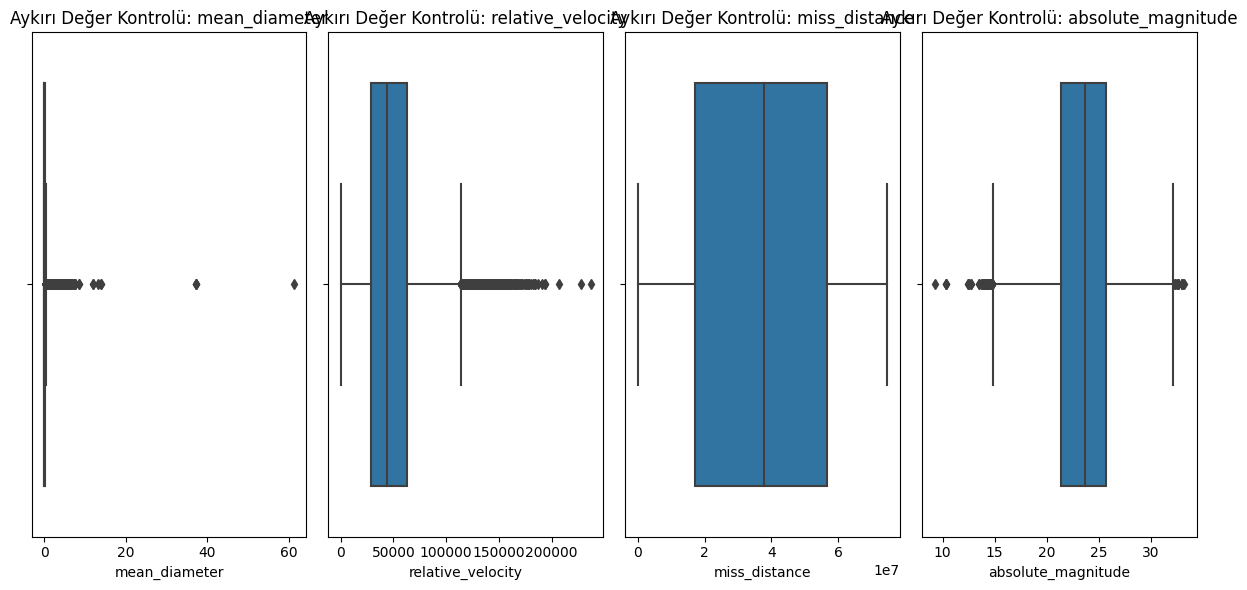

Hazardous sınıf dağılımı:
hazardous
0    0.902682
1    0.097318
Name: proportion, dtype: float64
Eğitim seti boyutu: (72668, 4), Test seti boyutu: (18168, 4)


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Eksik Değer Kontrolü
print("Eksik değer sayıları kolon bazında:")
print(df.isnull().sum())

# Eğer eksik değer varsa, stratejik doldurma
imputer = SimpleImputer(strategy='median')
num_cols = ['mean_diameter', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

df[num_cols] = imputer.fit_transform(df[num_cols])

# 2. Veri Tipi Düzeltme
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
df['hazardous'] = df['hazardous'].astype(int)

# 3. Aykırı Değer Kontrolü ve Görselleştirme
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Aykırı Değer Kontrolü: {col}')
plt.tight_layout()
plt.show()

# Opsiyonel: Aykırı değer sınırlandırma (örneğin %1 ve %99 persentil ile)
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# 4. Özellik Mühendisliği
df['log_relative_velocity'] = np.log1p(df['relative_velocity'])
df['log_miss_distance'] = np.log1p(df['miss_distance'])

# 5. Özellik Ölçeklendirme
scaler = StandardScaler()
features_to_scale = ['mean_diameter', 'log_relative_velocity', 'log_miss_distance', 'absolute_magnitude']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# 6. Kategorik Değişken Encoding
# Şu an sadece 'hazardous' var ve zaten sayısal
# Eğer başka kategorik kolon varsa örneğin 'orbit_class' gibi:
# df = pd.get_dummies(df, columns=['orbit_class'], drop_first=True)

# 7. Veri Dengesizliği Kontrolü
print("Hazardous sınıf dağılımı:")
print(df['hazardous'].value_counts(normalize=True))

# Eğer sınıflar çok dengesizse (örneğin tehlikeli azsa)
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X = df[features_to_scale]
# y = df['hazardous']
# X_res, y_res = smote.fit_resample(X, y)
# print("SMOTE sonrası sınıf dağılımı:")
# print(pd.Series(y_res).value_counts())

# 8. Eğitim-Test Seti Bölme
X = df[features_to_scale]
y = df['hazardous']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Eğitim seti boyutu: {X_train.shape}, Test seti boyutu: {X_test.shape}")



6. Random Forest ile Model Optimizasyonu

Random Forest, birden fazla karar ağacından oluşan güçlü bir sınıflandırma algoritmasıdır.  
Modelin performansını artırmak için hiperparametre optimizasyonu yapılacaktır.  
Bu amaçla `RandomizedSearchCV` kullanılarak geniş ama mantıklı bir parametre aralığında en iyi kombinasyonlar aranacaktır.  

-->6.1. Rasgeleleştirilmiş Hiperparametre Araması (Hızlı Sürüm)
Modelin performansını artırmak ve en iyi parametre kombinasyonunu bulmak amacıyla RandomizedSearchCV kullanılmıştır. İlk aşamada, eğitim süresini kısaltmak için daha dar bir arama uzayı ve daha düşük sayıda deneme kombinasyonu (n_iter=10, cv=3) tercih edilmiştir. Bu sayede modelin kaba optimizasyonu hızlıca gerçekleştirilmiştir.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Parametre aralığı - daha hızlı deneme için optimize edildi
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Model nesnesi
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV daha kısa sürede çalışacak şekilde ayarlandı
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,           # Daha az kombinasyon dene → hızlı sonuç
    cv=3,                # 3 katlı çapraz doğrulama → yeterli denge
    verbose=1,           # Eğitim sürecini terminalde göster
    random_state=42,
    n_jobs=-1            # Tüm işlemcileri kullan
)

# Modeli eğit
random_search.fit(X_train, y_train)

# En iyi modelle tahmin yap
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Sonuçları yazdır
print("🔍 En iyi parametreler:", random_search.best_params_)
print("✅ Doğruluk (accuracy):", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔍 En iyi parametreler: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
✅ Doğruluk (accuracy): 0.9178775869660942

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     16400
           1       0.65      0.34      0.44      1768

    accuracy                           0.92     18168
   macro avg       0.79      0.66      0.70     18168
weighted avg       0.90      0.92      0.91     18168



-->6.2. Rasgeleleştirilmiş Hiperparametre Araması (Genişletilmiş Sürüm)
İlk hızlı denemelerden elde edilen içgörüler doğrultusunda, hiperparametre araması bu aşamada daha geniş bir kapsamda tekrar gerçekleştirilmiştir. RandomizedSearchCV, 30 farklı parametre kombinasyonu ve 5 katlı çapraz doğrulama (cv=5) ile uygulanarak daha sağlam ve güvenilir bir model seçimi hedeflenmiştir. Bu yapı, modelin genelleme kapasitesini artırmaya yöneliktir.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Daha dar ve mantıklı bir parametre aralığı deneyelim
param_dist = {
    'n_estimators': [100, 200, 300],          # Ağaç sayısı
    'max_depth': [10, 20, 30, None],          # Derinlik sınırı
    'min_samples_split': [2, 5, 10],          # Bir düğümün bölünmesi için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],            # Yaprakta kalacak minimum örnek sayısı
    'max_features': ['sqrt', 'log2'],          # Her düğümde kullanılacak özellik sayısı
    'bootstrap': [True, False]                 # Örnekleme yöntemi
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                # Denenecek parametre kombinasyonu sayısı
    cv=5,                    # 5 katlı çapraz doğrulama
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("En iyi parametreler:", random_search.best_params_)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
En iyi parametreler: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Optimized Accuracy: 0.9175473359753412

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16400
           1       0.69      0.28      0.40      1768

    accuracy                           0.92     18168
   macro avg       0.81      0.63      0.68     18168
weighted avg       0.90      0.92      0.90     18168



7. Model Değerlendirme

Optimizasyon sonucu elde edilen en iyi model, test verisi üzerinde performans açısından değerlendirilir.  
Doğruluk (accuracy), kesinlik (precision), duyarlılık (recall) ve F1 skoru gibi metriklerin yanı sıra,  
modelin sınıflandırma başarısını detaylı görebilmek için karışıklık matrisi (confusion matrix) görselleştirilir.  

Bu değerlendirmeler modelin ne kadar güvenilir ve dengeli olduğunu anlamamız için önemlidir.

Optimized Random Forest Accuracy: 0.9175473359753412

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16400
           1       0.69      0.28      0.40      1768

    accuracy                           0.92     18168
   macro avg       0.81      0.63      0.68     18168
weighted avg       0.90      0.92      0.90     18168



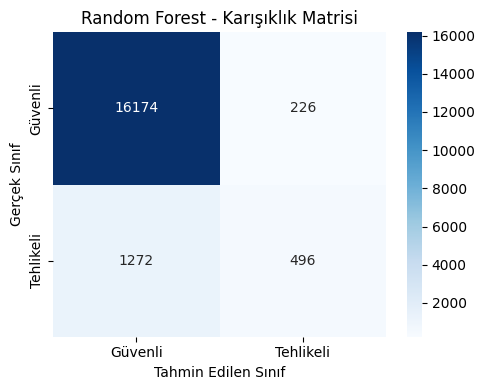

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tahmin
y_pred = best_rf.predict(X_test)

# Değerlendirme
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Güvenli", "Tehlikeli"],
            yticklabels=["Güvenli", "Tehlikeli"])
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Random Forest - Karışıklık Matrisi')
plt.tight_layout()
plt.show()


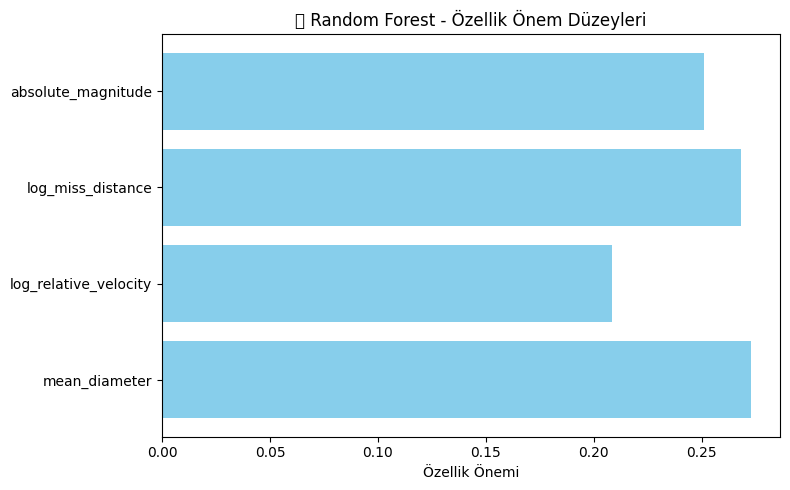

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  37.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  11.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  54.8s
[CV] END bootstrap=False, max_depth=20, 

In [18]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Özellik Önemi")
plt.title("📊 Random Forest - Özellik Önem Düzeyleri")
plt.tight_layout()
plt.show()


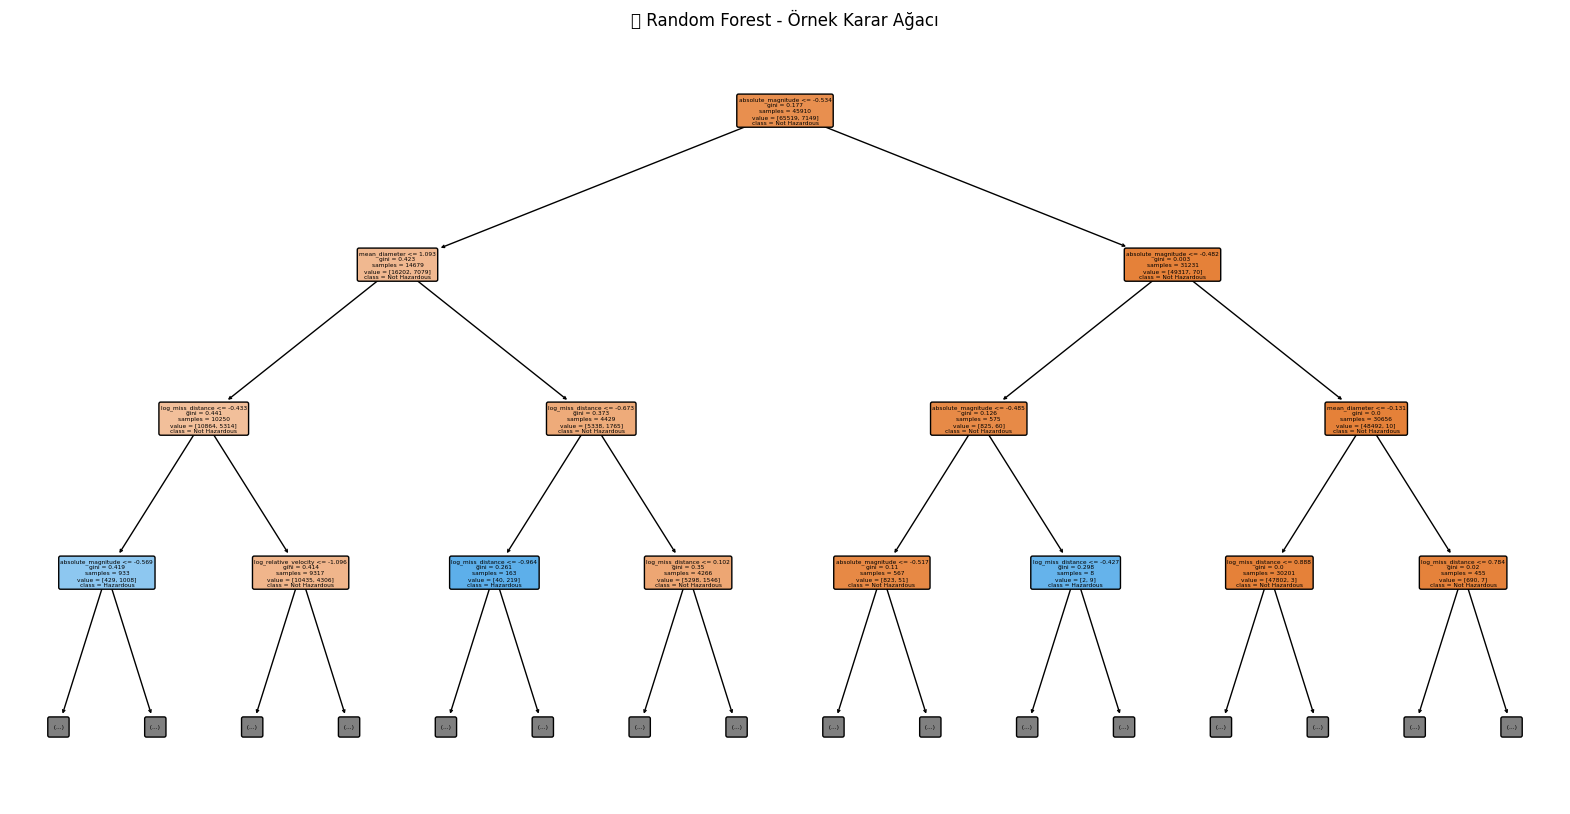

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0],  # Random Forest'teki ilk ağaç
          feature_names=X_train.columns,
          class_names=['Not Hazardous', 'Hazardous'],
          filled=True,
          rounded=True,
          max_depth=3)  # Görselliği net tutmak için derinlik sınırı
plt.title("🌳 Random Forest - Örnek Karar Ağacı")
plt.show()
